In [ ]:
!pip install brian2tools

     |████████████████████████████████| 1.2MB 25.9MB/s 
     |████████████████████████████████| 71kB 9.7MB/s 
  Created wheel for brian2: filename=Brian2-2.4.2-cp37-cp37m-linux_x86_64.whl size=1257143 sha256=b7e12c58e13eb9a9849c3d7256e21ec9e5de6d3b3d181c47c7fcdfc0baf820e9
  Stored in directory: /root/.cache/pip/wheels/5d/4b/cf/ef50e71df5479d67f981cbb17b1d842381019d27ba144d57de
Successfully built brian2


In [ ]:
from brian2 import *
import random

In [ ]:
start_scope()

tau_pre = tau_post = 10*ms
A_pre = 0.15
A_post = -A_pre*tau_pre/tau_post*1.5
t_max = 50*ms
N = 100

# Presynaptic neurons G spike at times from 0 to tmax
# Postsynaptic neurons G spike at times from tmax to 0
# So difference in spike times will vary from -tmax to +tmax
presynaptic = NeuronGroup(N, 'tspike:second', threshold='t>tspike', refractory=100*ms)
postsynaptic = NeuronGroup(N, 'tspike:second', threshold='t>tspike', refractory=100*ms)
presynaptic.tspike = 'i*tmax/(N-1)'
postsynaptic.tspike = '(N-1-i)*tmax/(N-1)'

S = Synapses(presynaptic, postsynaptic,
             '''
             w : 1
             dapre/dt = -apre/tau_pre : 1 (event-driven)
             dapost/dt = -apost/tau_post : 1 (event-driven)
             ''',
             on_pre='''
             apre += A_pre
             w = w+apost
             ''',
             on_post='''
             apost += A_post
             w = w+apre
             ''')
S.connect(j='i')

run(tmax+1*ms)

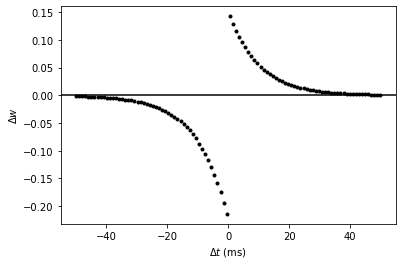

In [ ]:
plot((postsynaptic.tspike - presynaptic.tspike)/ms, S.w, '.k')
xlabel(r'$\Delta t$ (ms)')
ylabel(r'$\Delta w$')
axhline(0, ls='-', c='k')
show()